In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv('C:/Users/lokesh.saini/Downloads/Wholesale customers data.csv')
for i in data.columns:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    data = data.loc[(data[i] > q1-1.5*iqr) & (data[i] < q3+1.5*iqr)]

In [3]:
x = data.iloc[:,2:].values
x.shape

(318, 6)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = sc.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [ ]:
data.describe()

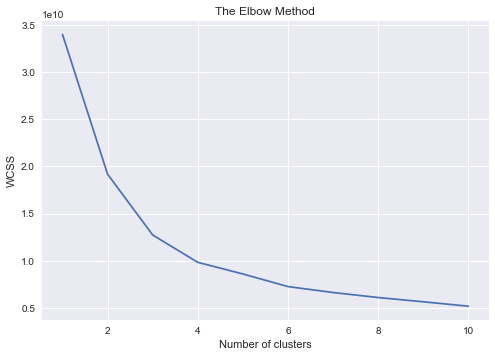

In [19]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)


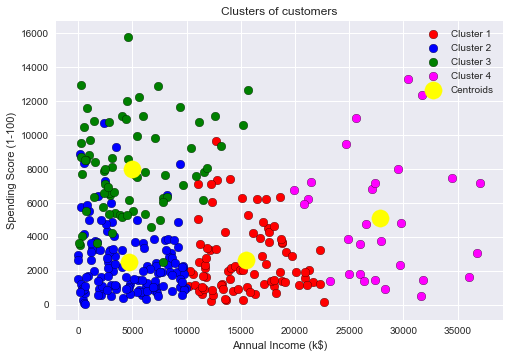

In [21]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, c = 'red',edgecolors = 'black', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, c = 'blue',edgecolors = 'black', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, c = 'green',edgecolors = 'black', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 75, c = 'magenta',edgecolors = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
data

In [10]:
Cluster=pd.DataFrame(y_kmeans, columns=['cluster']) 
print (Cluster)

     cluster
0          0
1          2
2          0
3          1
4          0
5          2
6          1
7          2
8          2
9          0
10         3
11         3
12         3
13         0
14         2
15         0
16         2
17         0
18         1
19         0
20         1
21         0
22         0
23         1
24         0
25         3
26         1
27         2
28         2
29         2
..       ...
288        1
289        1
290        3
291        3
292        0
293        1
294        2
295        1
296        1
297        2
298        1
299        2
300        2
301        2
302        2
303        1
304        2
305        0
306        3
307        0
308        0
309        2
310        1
311        1
312        2
313        0
314        1
315        0
316        0
317        1

[318 rows x 1 columns]


In [11]:
result = pd.concat([data, Cluster], axis=1)

In [ ]:
result.to_clipboard()

In [12]:
result

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2.0,3.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,2.0
6,2.0,3.0,12126.0,3199.0,6975.0,480.0,3140.0,545.0,1.0
7,2.0,3.0,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0,2.0
8,1.0,3.0,5963.0,3648.0,6192.0,425.0,1716.0,750.0,2.0
9,2.0,3.0,6006.0,11093.0,18881.0,1159.0,7425.0,2098.0,0.0


In [ ]:
result.groupby(['cluster'])['Fresh'].mean()

In [13]:
result.drop(["Channel","Region"],axis=1,inplace=True)
g1 = result.groupby( [ "cluster"] ).mean()
g1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0.0,8876.214286,4139.982143,5814.375000,1834.732143,2034.678571,901.142857
1.0,10013.673469,4393.265306,5967.918367,1829.704082,2072.571429,1002.244898
2.0,10141.166667,3735.851852,5294.500000,1623.722222,1595.129630,1077.277778
3.0,10465.142857,4745.142857,5692.285714,1831.142857,2046.238095,1049.000000


In [14]:
g2 = result.groupby( [ "cluster"] ).count()
g2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0.0,56,56,56,56,56,56
1.0,98,98,98,98,98,98
2.0,54,54,54,54,54,54
3.0,21,21,21,21,21,21
